In [3]:
%load_ext autoreload
%autoreload 2


from text3d2video.artifacts.animation_artifact import AnimationArtifact
from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
animation = AnimationArtifact.from_wandb_artifact_tag("mixamo-sideways:latest")

n_images = 20

frames = animation.frame_nums(n_images)
meshes = animation.load_frames(frames)
cameras = animation.cameras(frames)

verts_uvs, faces_uvs = animation.texture_data()

depth_maps = render_depth_map(meshes, cameras)

In [33]:
from text3d2video.uv_noise import prepare_uv_initialized_latents
import torchvision.transforms.functional as TF
from text3d2video.video_util import pil_frames_to_clip
from PIL import Image

latents = prepare_uv_initialized_latents(
    meshes, cameras, verts_uvs, faces_uvs, latent_texture_res=30
)

def to_pil_images(latents):
    latents_ims = latents[:, 0:3, :, :].cpu()
    latents_ims = [TF.to_pil_image(latent) for latent in latents_ims]
    latents_ims = [latent.resize((512, 512), Image.NEAREST) for latent in latents_ims]
    return latents_ims

def display_latents(latents):
    latents_ims = latents[:, 0:3, :, :].cpu()
    latents_ims = [TF.to_pil_image(latent) for latent in latents_ims]
    display_ims(latents_ims, scale=10)

latent_pil_images = to_pil_images(latents)
clip = pil_frames_to_clip(latent_pil_images)
clip.ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


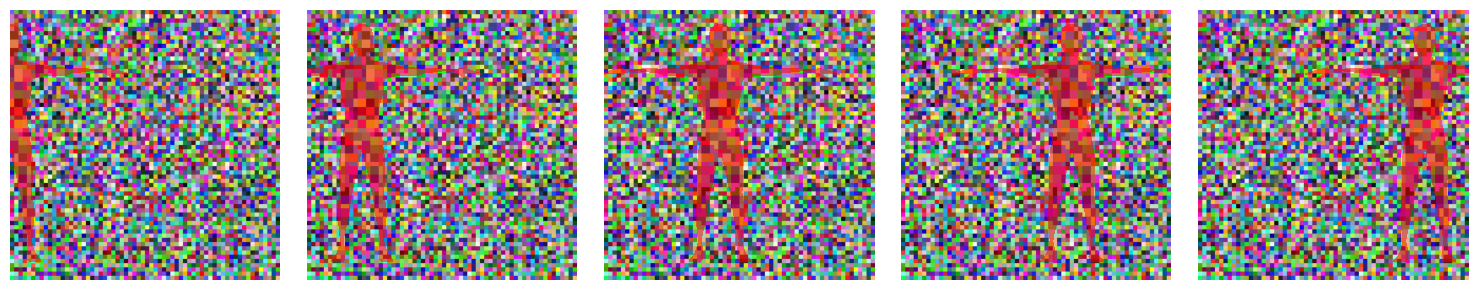

In [35]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


latents = prepare_uv_initialized_latents(
    meshes, cameras, verts_uvs, faces_uvs, latent_texture_res=30
)

latent_pil_images = to_pil_images(latents)

frame_indices = range(0, len(latent_pil_images), 4)

scale = 3
fig, axs = plt.subplots(1, len(frame_indices), figsize=(len(frame_indices) * scale, scale))
for i, frame_i in enumerate(frame_indices):
    im = latent_pil_images[frame_i]
    depth = depth_maps[frame_i]
    ax = axs[i]
    ax.axis("off")

    transparent_cmap = ListedColormap(["none"] + ["red"] * 5)

    ax.imshow(im)
    ax.imshow(depth, alpha=0.5, cmap=transparent_cmap)

plt.tight_layout()